In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\EDA\\Banking_Marketing_Analysis.csv",skiprows=2) # skiprows will skip first two rows 

# 1) Understanding the Data

In [3]:
df.head(10) # It will show first 10 rows of each columns

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


In [4]:
df.tail(10) # It will show last 10 rows of each columns

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45201,45202,53.0,100000,583,married,"management,tertiary",yes,no,no,no,cellular,17,"nov, 2017",3.76666666666667 min,1,184,4,success,yes
45202,45203,34.0,50000,557,single,"admin.,secondary",yes,no,no,no,cellular,17,"nov, 2017",3.73333333333333 min,1,-1,0,unknown,yes
45203,45204,23.0,4000,113,single,"student,tertiary",no,no,no,no,cellular,17,"nov, 2017",4.43333333333333 min,1,-1,0,unknown,yes
45204,45205,73.0,55000,2850,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",5 min,1,40,8,failure,yes
45205,45206,25.0,60000,505,single,"technician,secondary",yes,no,no,yes,cellular,17,"nov, 2017",6.43333333333333 min,2,-1,0,unknown,yes
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45210,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [5]:
df.isnull().sum() # It will show sum of null values of each columns

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [6]:
df.shape # It shows the dimension of dataframe

(45211, 19)

In [7]:
df.describe() # It gives the statical value of data

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [8]:
df.columns # It shows the all columns of dataframe

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [9]:
df.nunique() # It gives the number of unique values of each columns

customerid    45211
age              77
salary           11
balance        7168
marital           3
jobedu           48
targeted          2
default           2
housing           2
loan              2
contact           3
day              31
month            12
duration       2646
campaign         48
pdays           559
previous         41
poutcome          4
response          2
dtype: int64

# 2) Cleaning the Data

In [10]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [11]:
df.drop('customerid',axis=1,inplace=True) # Removing customerid column since it is unnecessary Data

In [12]:
df.head(10)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


In [13]:
#Extracting Job from jobedu column
df['job']=df["jobedu"].apply(lambda x:x.split(",")[0])

In [14]:
#Extracting Education from jobedu Column
df['education']=df["jobedu"].apply(lambda x:x.split(",")[1])

In [15]:
df.drop('jobedu',axis=1,inplace=True) # Removing 'jobedu' column from dataframe

In [16]:
df.head(10)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


In [17]:
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [18]:
df=df[~df.age.isnull()].copy() # Removing null values present in age column


In [19]:
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [20]:
#Now removing null values from 'month'column
mon_mode=df.month.mode()[0] # [0] will return single value in the series while [0] not used then it will return a series whether one value is returned.

In [21]:
# Now filling the missing value with mode values of month in data
df.month.fillna(mon_mode,inplace=True)

In [22]:
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [23]:
#  we remove null value from age & month column now there is still null value in response column.
#Now removing null values from 'response' column
df=df[~df.response.isnull()].copy()

In [24]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Finally we removed all null values.

In [25]:
df.head(10)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary
6,28.0,100000,447,single,no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no,management,tertiary
7,42.0,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no,entrepreneur,tertiary
8,58.0,55000,121,married,yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no,retired,primary
9,43.0,60000,593,single,yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no,technician,secondary


# 3) Handling outliers

Since we removed all null values now we have to deal with outliers

Outliers is something which is an odd-one-out or the one that is different from the crowd.

In [26]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [27]:
y=df.groupby('loan')

In [28]:
y.max()

,age,salary,balance,marital,targeted,default,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
loan,,,,,,,,,,,,,,,,,,
no,95.0,120000,102127,single,yes,yes,yes,unknown,31,"sep, 2017",999 sec,63,871,275,unknown,yes,unknown,unknown
yes,72.0,120000,51439,single,yes,yes,yes,unknown,31,"sep, 2017",99 sec,50,808,58,unknown,yes,unknown,unknown


In [29]:
y.mean()

,age,salary,balance,day,campaign,pdays,previous
loan,,,,,,,
no,41.008673,56759.332490,1474.962275,15.765791,2.74971,41.184725,0.591321
yes,40.553189,58293.124914,774.578918,16.023378,2.83497,34.920598,0.520681


In [30]:
#let's calculate the % age of each job status category
df.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

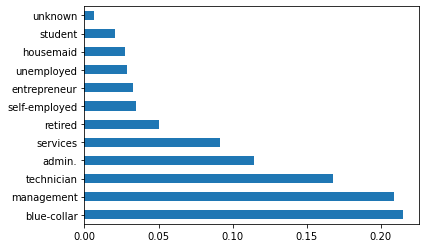

In [31]:
df.job.value_counts(normalize=True).plot.barh()
plt.show()

In [32]:
# The %age of each education category
df.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

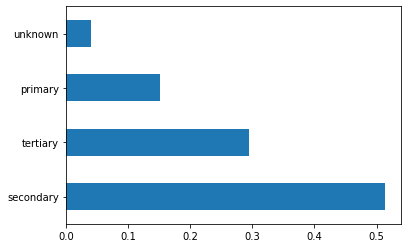

In [33]:
df.education.value_counts(normalize=True).plot.barh()
plt.show()

In [34]:
df.groupby(['loan']).apply(lambda x:x.sort_values(['salary'],ascending=False))

age  salary  balance  marital targeted default housing loan  \
loan                                                                       
no   45210  37.0  120000     2971  married      yes      no      no   no   
     3327   53.0  120000    22370  married      yes      no     yes   no   
     4216   28.0  120000     1306   single       no      no     yes   no   
     28167  36.0  120000      313  married      yes      no     yes   no   
     5676   43.0  120000        0   single       no      no     yes   no   
...          ...     ...      ...      ...      ...     ...     ...  ...   
yes  44076  32.0    4000       61   single      yes      no      no  yes   
     3324   49.0       0      341  married      yes      no     yes  yes   
     25762  33.0       0     1522   single      yes      no      no  yes   
     33195  50.0       0      341  married      yes      no     yes  yes   
     6558   32.0       0     -274   single      yes      no      no  yes   

             contact  day      month              duration  campaign  pdays  \
loan                                                                          
no   45210  cellular   17  nov, 2017  6.01666666666667 min         2    188   
     3327    unknown   15  may, 2017               106 sec         1     -1   
     4216    unknown   19  may, 2017               396 sec         3     -1   
     28167  cellular   29  jan, 2017  2.78333333333333 min         2    198   
     5676    unknown   26  may, 2017               142 sec         3     -1   
...              ...  ...        ...                   ...       ...    ...   
yes  44076  cellular    5  jul, 2017  2.96666666666667 min         3    515   
     3324    unknown   15  may, 2017               520 sec         2     -1   
     25762  cellular   19  nov, 2017              16.1 min         1     -1   
     33195  cellular   20  apr, 2017  11.1666666666667 min         4    340   
     6558    unknown   27  may, 2017               108 sec         3     -1   

            previous poutcome response           job  education  
loan                                                             
no   45210        11    other       no  entrepreneur  secondary  
     3327          0  unknown       no  entrepreneur   tertiary  
     4216          0  unknown       no  entrepreneur    unknown  
     28167         1  failure       no  entrepreneur  secondary  
     5676          0  unknown       no  entrepreneur   tertiary  
...              ...      ...      ...           ...        ...  
yes  44076         7  failure       no       student  secondary  
     3324          0  unknown      yes       unknown    primary  
     25762         0  unknown       no       unknown  secondary  
     33195         2  success      yes       unknown    primary  
     6558          0  unknown       no       unknown  secondary  

[45161 rows x 19 columns]

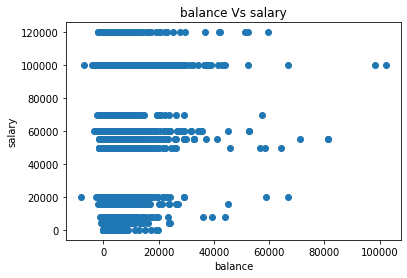

In [35]:
#plot scatter plot of balance & salary variable
plt.scatter(df.balance,df.salary)
plt.xlabel('balance')
plt.ylabel('salary')
plt.title('balance Vs salary')
plt.show()

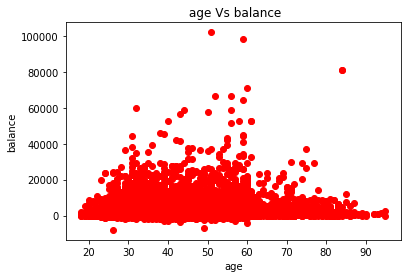

In [36]:
# plt scatter plot of balance & age
plt.scatter(df.age,df.balance,color='r')
plt.ylabel('balance')
plt.xlabel('age')
plt.title(' age Vs balance')
plt.show()

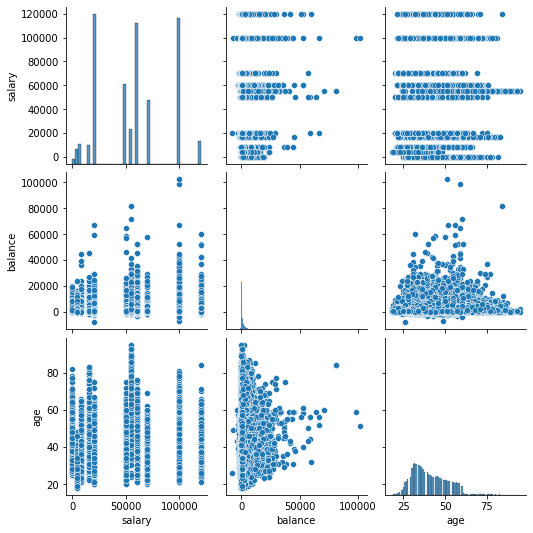

In [37]:
# Pair plot of salary,balance,age
sns.pairplot(df[['salary','balance','age']])
plt.show()

In [38]:
df[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


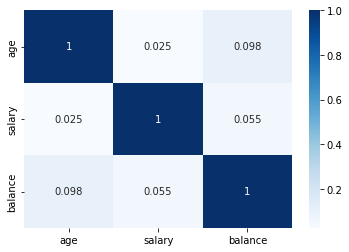

In [39]:
sns.heatmap(df[['age','salary','balance']].corr(),annot=True,cmap='Blues')
plt.show()

In [40]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [41]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [42]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


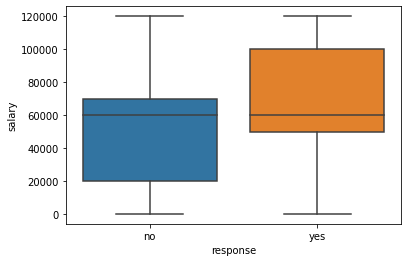

In [43]:
# Box Plot 
sns.boxplot(df.response,df.salary)
plt.show()

In [44]:
df['response_rate']=np.where(df.response=='yes',1,0)

In [45]:
df.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

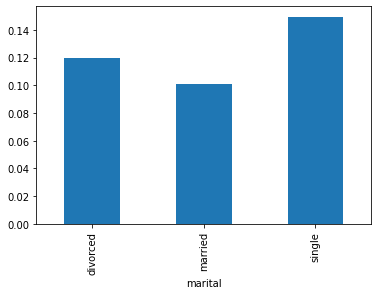

In [46]:
# Bar graph of marital status value of response_rate
df.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

In [47]:
result=pd.pivot_table(data=df,index='education',columns='marital',values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


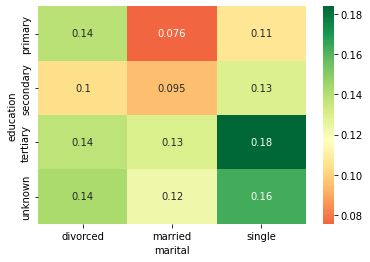

In [48]:
sns.heatmap(result,annot=True,cmap='RdYlGn',center=0.117)
plt.show()